In [1]:
import train as train
import generate
import eval
from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np

In [2]:
BASE_DIR = "./experiments/pipeline-test"
PROFILE = "sum-1x"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = True

====== Generating profile en-1x-10k ======


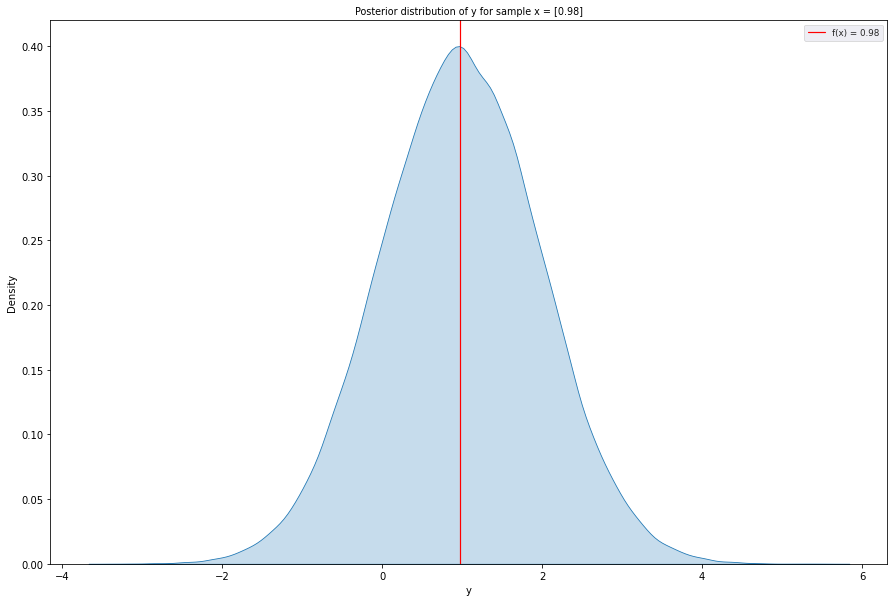

In [6]:
if GENERATE:
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [7]:
if TRAIN:
    train.train(config, f"{BASE_DIR}")

Using device: cpu
===== Training profile en-1x =====


Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Saved model and parameters to ./experiments/pipeline-test/en-1x/model


In [8]:
if EVAL:
    eval.eval(config, dataset_config, f"{BASE_DIR}")

Loaded model and parameters from ./experiments/pipeline-test/en-1x/model
using device: cpu
====== evaluating profile en-1x ======
KL divergence2:  13.378641807291265
KL divergence data:  -inf
KL divergence2:  9.62513504905967
KL divergence data:  -inf
KL divergence2:  17.85056145214191
KL divergence data:  -inf


/home/alvar/Documents/master/main-pipeline/modules/metrics.py:38: RuntimeWarning: divide by zero encountered in log
  D += (d/n)*np.sum(np.log(nu_d/rho_d[::, -1]))


In [9]:
# Load test samples from eval
data_samples = np.genfromtxt(f"{BASE_DIR}/{NAME}/results/samples/data_samples.csv", delimiter=",")
pred_samples = np.genfromtxt(f"{BASE_DIR}/{NAME}/results/samples/predictive_samples.csv", delimiter=",")

# Load in domain samples
data_in_domain_samples = np.genfromtxt(f"{BASE_DIR}/{NAME}/results/samples/data_in_domain_samples.csv", delimiter=",")
pred_in_domain_samples = np.genfromtxt(f"{BASE_DIR}/{NAME}/results/samples/predictive_in_domain_samples.csv", delimiter=",")

# Load out of domain samples
data_out_domain_samples = np.genfromtxt(f"{BASE_DIR}/{NAME}/results/samples/data_out_domain_samples.csv", delimiter=",")
pred_out_domain_samples = np.genfromtxt(f"{BASE_DIR}/{NAME}/results/samples/predictive_out_domain_samples.csv", delimiter=",")

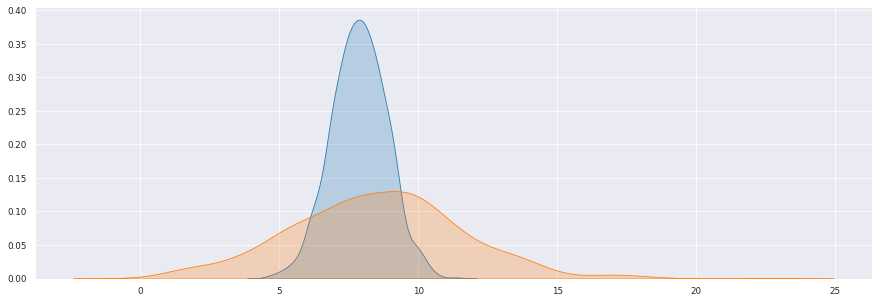

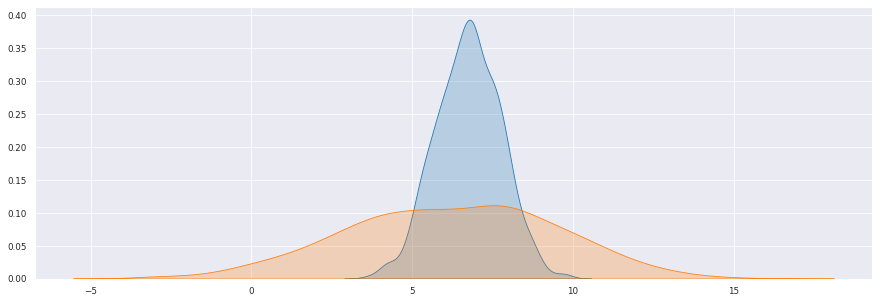

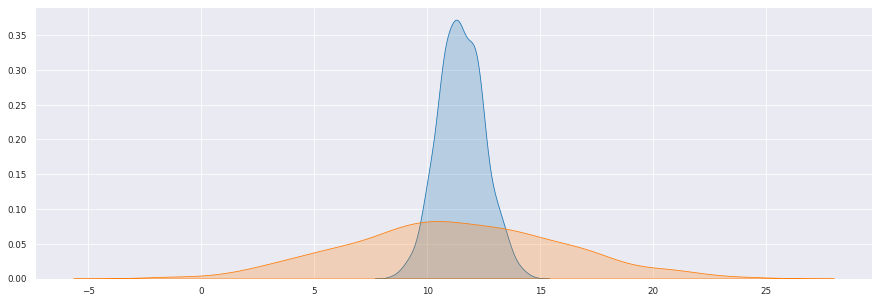

In [10]:
i = 8
plots.plot_comparison(pred_samples[:, i], data_samples[:, i], figsize=(15, 5))
plots.plot_comparison(pred_in_domain_samples[:, i], data_in_domain_samples[:, i], figsize=(15, 5))
plots.plot_comparison(pred_out_domain_samples[:, i], data_out_domain_samples[:, i], figsize=(15, 5))